In [5]:
import matplotlib.pyplot as plt
import torch
import pytorch_measure as pm
import numpy as np
N = 17 # number of weights
M = 1000 # Number of datapoints
verbose = True
dev = 'cpu'

x = torch.linspace(0, 10, M)
data = -2 + x + torch.randn(M).to(dev)

w = torch.softmax(torch.ones(N,dtype=torch.float),dim=-1).to(dev)
w = torch.nn.parameter.Parameter(w)
l = torch.linspace(-6, 2, N, requires_grad=False).to(dev)

def regression_model(a,x):
    return a+x

index = []
for i in range(M):
    ab = (regression_model(l, x[i]) - data[i]).abs()
    index.append(torch.argmin(ab))

def NLLLoss(m:list[pm.Measure]):
    return -m[0].weights[index].log().sum()  # [mask[index]]

sd = (l[index] - data)**2
def WardLoss(w):
    return sum(sd * w[index])


Epoch: 0          Loss: 2654       LR: [0.1]
Epoch: 2          Lr was reduced to: [0.06999999999999999]
Epoch: 3          Lr was reduced to: [0.048999999999999995]
Epoch: 4          Lr was reduced to: [0.0343]
Epoch: 6          Lr was reduced to: [0.06999999999999999]
Epoch: 7          Lr was reduced to: [0.048999999999999995]
Epoch: 9          Lr was reduced to: [0.06999999999999999]
Epoch: 10         Lr was reduced to: [0.048999999999999995]
Epoch: 10         Loss: inf        LR: [0.048999999999999995]
Epoch: 12         Lr was reduced to: [0.06999999999999999]
Epoch: 13         Lr was reduced to: [0.048999999999999995]
Epoch: 15         Lr was reduced to: [0.06999999999999999]
Epoch: 16         Lr was reduced to: [0.048999999999999995]
Epoch: 18         Lr was reduced to: [0.06999999999999999]
Epoch: 19         Lr was reduced to: [0.048999999999999995]
Epoch: 20         Lr was reduced to: [0.0343]
Epoch: 20         Loss: inf        LR: [0.0343]
Epoch: 21         Lr was reduced to: [0

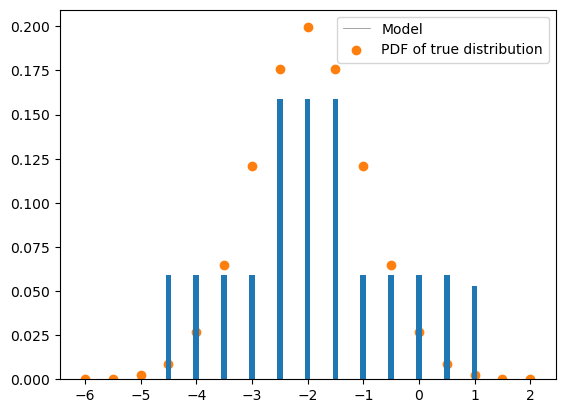

In [6]:
measure = pm.Measure(locations=l, weights=w, device=dev)
opt = pm.Optimizer([measure], lr=1e-3)
opt.minimize(NLLLoss, verbose=True, print_freq=10, max_epochs=5000, tol_const=1e-3)

plt.plot()

mu=0 #Create true values
sigma=1
xs = l.detach()
y=1/(np.sqrt(2*np.pi)*sigma)*torch.exp(-(xs+2-mu)**2/(2*sigma**2))
y/=sum(y) #Normalize

measure.visualize()
plt.scatter(xs, y, zorder=0)
plt.legend(['Model','PDF of true distribution'])
plt.show()
